In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("rop_clean.csv")

In [3]:
df.head()

,review_rating,user_name,review_date,review_title,review_text,num_helpful_reactions,num_total_reactions,episode_number,season_number,review_score,...,review_text_original,review_title_len_no_token,review_text_len_no_token,full_review_text,review_title_clean,review_text_clean,full_review_text_clean,review_rating_categorical,review_rating_5_scale,review_sentiment
0,6,Dannyboi942,2022-09-02,"better than the first episode, but still miss...",adrift is a better episode than the choppy fir...,111,196,2,1,56.63,...,Adrift is a better episode than the choppy fir...,59,1221,"better than the first episode, but still miss...",better first episode still missing something,adrift better episode choppy first paced bette...,better first episode still missing something a...,average,3,positive
1,8,TheOne7462,2022-09-02,hopeful,first two episodes are good. on a technical as...,175,326,2,1,53.68,...,First two episodes are good. On a technical as...,8,774,hopeful first two episodes are good. on a tec...,hopeful,first two episode good technical aspect qualit...,hopeful first two episode good technical aspec...,good,4,positive
2,6,johndavidson-18,2022-09-08,"watchable, tolkien adjacent fantasy",this second episode of the series confirms wit...,13,18,2,1,72.22,...,This second episode of the series confirms wit...,36,2338,"watchable, tolkien adjacent fantasy this seco...",watchable tolkien adjacent fantasy,second episode series confirms without shadow ...,watchable tolkien adjacent fantasy second epis...,average,3,positive
3,3,vaderis3,2022-09-03,weak tea,neither better nor worse than the first episod...,22,41,2,1,53.66,...,Neither better nor worse than the first episod...,9,1616,weak tea neither better nor worse than the fi...,weak tea,neither better worse first character continue ...,weak tea neither better worse first character ...,bad,2,negative
4,6,quiqueperezsoler3,2022-09-03,an in-depth episode review. summary: the plot...,the arrival of a being from the sky builds up ...,7,11,2,1,63.64,...,The arrival of a being from the sky builds up ...,145,6604,an in-depth episode review. summary: the plot...,episode review summary plot thickens imperfect...,arrival sky build mystery giving insight nori ...,episode review summary plot thickens imperfect...,average,3,positive


### Histogram of Ratings

In [64]:
def build_histogram_of_rating_scores(df: pd.DataFrame, season: int, episode: int, show: str, x: str="review_rating"):
    n_colors = df[x].nunique()  # Get number of colors for palette
    rg_palette = sns.color_palette("RdYlGn_r", n_colors=n_colors)
    rg_palette.reverse()  # reverse palette from red to green

    # Construct the cat plot
    g = sns.catplot(data=df, x=x, kind="count", palette=rg_palette, height=5, aspect=1.5, order=["abysmal", "bad", "average", "good", "amazing"])
    ax = g.facet_axis(0, 0)  # extract the matplotlib axes_subplot objects from the FacetGrid

    # Iterate through the axes containers to assign tooltips
    for c in ax.containers:
        values = [v.get_height() for v in c]
        values_sum = sum(values)
        labels = [f"{round((v / values_sum) * 100)}%" for v in values]  
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10)

    # Handle x axis title
    if x == "review_rating":
        xlabel = "Original Review Rating Score"
        dtype = "Review Rating Original Scores"
    elif x == "review_rating_categorical":
        xlabel = "Review Rating Category"
        dtype = "Review Rating Categories"
    elif x == "review_rating_5_scale":
        xlabel = "Downscaled Review Rating Score"
        dtype = "Review Rating Downscaled Scores"
    plt.xlabel(xlabel, fontsize=10)
    
    # Handle y axis title
    plt.ylabel("Frequency", fontsize=10)

    # Handle plot title according to data
    if episode is None:
        title = f"({show}-S{season}) Histogram of All {dtype}"
    else:
        if episode == 0:
            title = f"({show}-S{season}) Histogram of Show {dtype}"
        else:
            title = f"({show}-S{season}:E{episode}) Histogram of {dtype}"
    plt.title(title, fontweight="bold", fontsize=14)
    
    # Show plot and close it
    plt.show()
    plt.clf()
    
#build_histogram_of_rating_scores(df, 1, None, "ROP")

#for episode in range(0, max(df.episode_number.unique())+1):
#    temp_df = df[df.episode_number == episode]
#    build_histogram_of_rating_scores(df=temp_df, season=1, episode=episode, show="ROP")

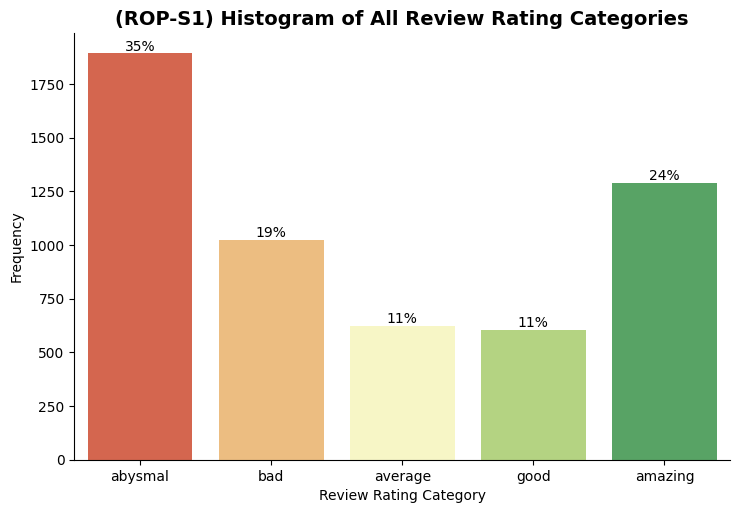

<Figure size 1000x1000 with 0 Axes>

In [65]:
build_histogram_of_rating_scores(df=df, season=1, episode=None, show="ROP", x="review_rating_categorical")

<AxesSubplot: xlabel='review_rating', ylabel='Count'>

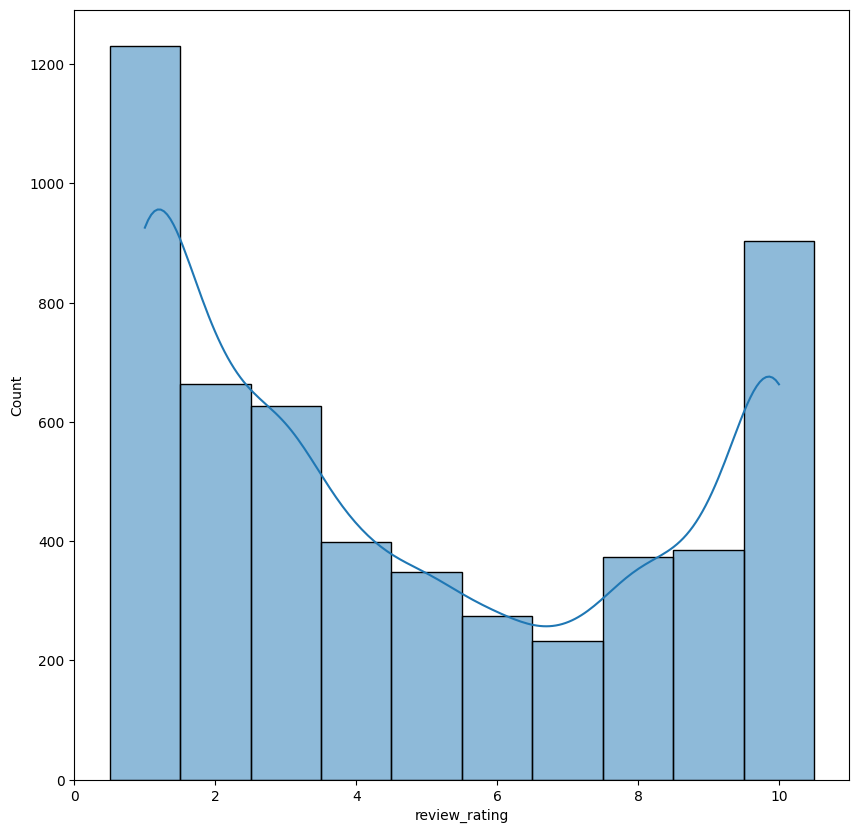

In [46]:
sns.histplot(data=df, x="review_rating", kde=True, bins=10, discrete=True)

<AxesSubplot: xlabel='review_score', ylabel='Count'>

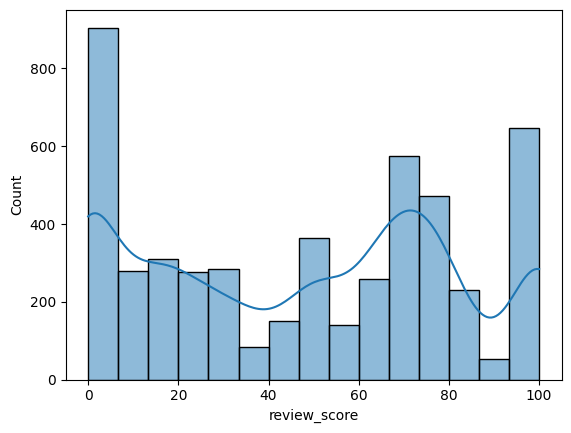

In [25]:
sns.histplot(data=df, x="review_score", kde=True)

<AxesSubplot: xlabel='episode_number', ylabel='review_rating'>

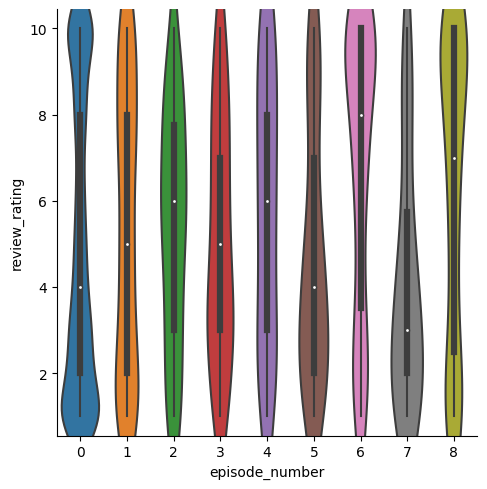

In [39]:
g = sns.catplot(data=df, x="episode_number", y="review_rating", kind="violin")
sns.stripplot(data=df, x="episode_number", y="review_rating", color="k", size=0, ax=g.ax)


In [40]:
import collections
cat_freq = pd.DataFrame(sorted(dict(df.review_rating.value_counts()).items()), columns=["Review Rating", "Frequency"])

In [45]:
df.columns

Index(['review_rating', 'user_name', 'review_date', 'review_title',
       'review_text', 'num_helpful_reactions', 'num_total_reactions',
       'episode_number', 'season_number', 'review_score', 'full_review_text',
       'review_title_clean', 'review_text_clean', 'full_review_text_clean',
       'rating_category', 'review_sentiment'],
      dtype='object')

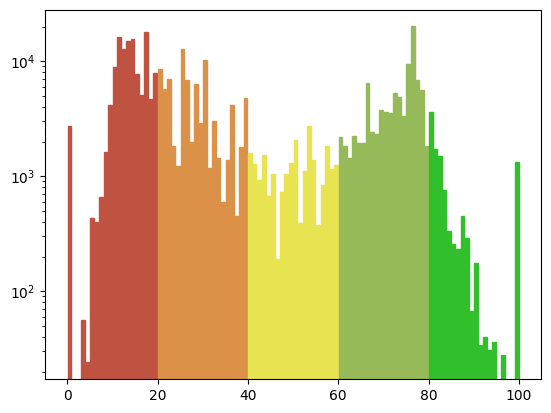

In [82]:
N, bins, patches =  plt.hist(data=df, x="review_score", bins=100, rwidth=0.8, weights="num_total_reactions", log=True)
#sns.histplot(data=df, x="review_score", weights="num_total_reactions", stat="percent", bins=25, kde=True, discrete=True)

#Define the colors for your pathces (you can write them in any format):
colors    = ['#bf5241', '#db9248', '#e8e351', '#96ba59', '#31bf2c']
#Define the ranges of your patches:
divisions = [range(0, 20), range(20, 40), range(40, 60), range(60, 80), range(80, 100)]
#If you want to label the regions/divisions:
labels = ["Red", "Orange", "Yellow", "Green", "Birhg Green"]

#for each division color the parches according to the specified colors:
for d in divisions:
    patches[list(d)[0]].set_label(labels[divisions.index(d)])
    for i in d:
        patches[i].set_color(colors[divisions.index(d)])
        


<AxesSubplot: xlabel='review_score', ylabel='Percent'>

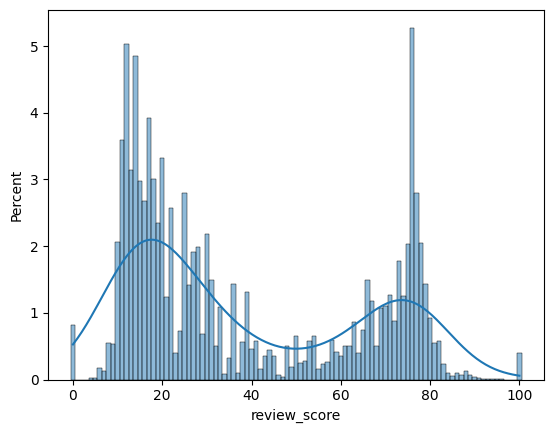

In [70]:
sns.histplot(data=df, x="review_score", weights="num_total_reactions", stat="percent", bins=25, kde=True, discrete=True)

<AxesSubplot: xlabel='review_score', ylabel='Percent'>

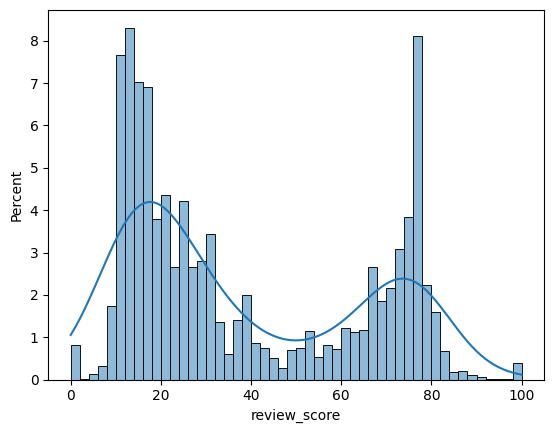

In [77]:
sns.histplot(data=df, x="review_score", weights="num_total_reactions", stat="percent", bins=50, kde=True, discrete=False)

In [23]:
df.columns

Index(['review_rating', 'user_name', 'review_date', 'review_title',
       'review_text', 'num_helpful_reactions', 'num_total_reactions',
       'episode_number', 'season_number', 'review_score', 'full_review_text',
       'review_title_clean', 'review_text_clean', 'full_review_text_clean',
       'rating_category', 'review_sentiment'],
      dtype='object')

In [ ]:
sns.catplot(data=df, x="review_rating", kind="count", palette="RdYlGn_r")

In [115]:
by_episode_ratings = df.groupby("episode_number").agg(
    avg_review_rating=("review_rating", "mean"),
    median_review_rating=("review_rating", "median"),
    mode_review_rating=("review_rating", lambda x:x.value_counts().index[0]),
    std_review_rating=("review_rating", "std"),
    
    sum_review_reactions=("num_total_reactions", "sum"),
    avg_review_sentiment=("review_score", "mean"),
    median_review_sentiment=("review_score", "median"),
    mode_review_sentiment=("review_score", lambda x:x.value_counts().index[0]),
    std_review_sentiment=("review_score", "std"),
    
    sum_reviews=("review_title", "count")
).reset_index()


In [116]:
by_episode_ratings

,episode_number,avg_review_rating,median_review_rating,mode_review_rating,std_review_rating,sum_review_reactions,avg_review_sentiment,median_review_sentiment,mode_review_sentiment,std_review_sentiment,sum_reviews
0,0,4.754250,4.0,1,3.396029,283052,48.645701,57.14,0.00,36.017394,4529
1,1,5.252033,5.0,1,3.199728,8867,34.612605,37.98,0.00,22.370640,246
2,2,5.341463,6.0,6,2.672307,1771,48.540732,50.00,50.00,16.359595,82
3,3,5.051724,5.0,3,2.746840,5670,45.225702,47.95,0.00,27.156874,116
4,4,5.688525,6.0,10,3.030627,4011,40.925082,38.89,33.33,17.621777,61
5,5,4.653333,4.0,2,2.933927,6377,51.988933,53.57,100.00,20.816336,75
6,6,6.755906,8.0,10,3.240901,10479,40.407795,38.42,25.00,18.438829,127
7,7,4.018519,3.0,1,2.811638,2667,58.268889,63.12,100.00,24.971357,54
8,8,6.272109,7.0,10,3.461249,8208,39.054384,34.55,20.00,18.308086,147


In [94]:
by_episode_ratings.review_rating.mean()

5.3097623618503755

In [89]:
df.review_rating.mean()

4.881552326650726

In [97]:
by_episode_ratings

,review_rating
episode_number,
0,4.754250
1,5.252033
2,5.341463
3,5.051724
4,5.688525
5,4.653333
6,6.755906
7,4.018519
8,6.272109


<AxesSubplot: xlabel='episode_number', ylabel='review_rating'>

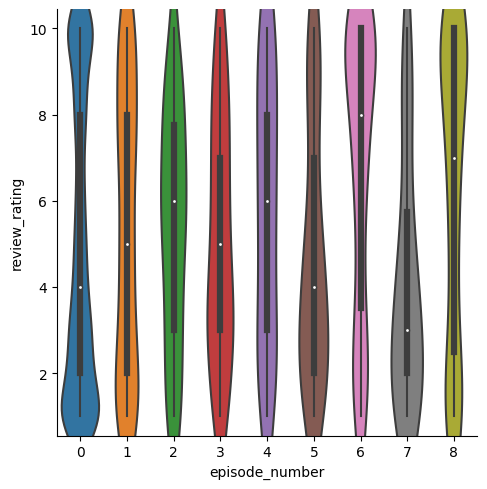

In [96]:
g = sns.catplot(data=df, x="episode_number", y="review_rating", kind="violin")
sns.stripplot(data=df, x="episode_number", y="review_rating", color="k", size=0, ax=g.ax)


I see the actual scores from the reviews are much lower than the rating without reviews. As it turns out, they calculate the average rating using an arcane algorithm based on weighted averages.

https://www.imdb.com/title/tt7631058/ratings/?ref_=tt_ov_rt

https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK?ref_=cons_tt_rt_wtavg#

In [198]:
rop_trends = pd.read_csv("rop_google_trends.csv", header=1)
rop_trends.rename({"Day": "date", "rings of power: (Worldwide)": "interest"}, axis=1, inplace=True)
rop_trends["date"] = rop_trends["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

hotd_trends = pd.read_csv("hotd_google_trends.csv", header=1)
hotd_trends.rename({"Day": "date", "house of the dragon: (Worldwide)": "interest"}, axis=1, inplace=True)
hotd_trends["date"] = hotd_trends["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))


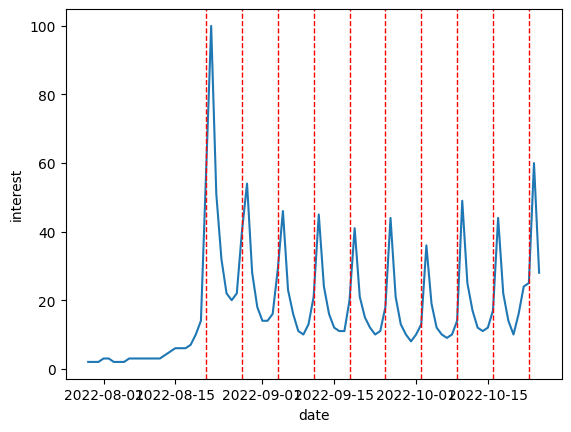

In [200]:
start_date = datetime.strptime('2022-08-21', "%Y-%m-%d")
episode_dates = [start_date]

for x in range(1,10):
    episode_dates.append(start_date + timedelta(days=7*x))
    
sns.lineplot(hotd_trends, x = hotd_trends.date, y = hotd_trends.interest)
plt.figsize=(14,42)
for x in episode_dates:
    plt.axvline(pd.to_datetime(x), color='r', linestyle='--', lw=1)

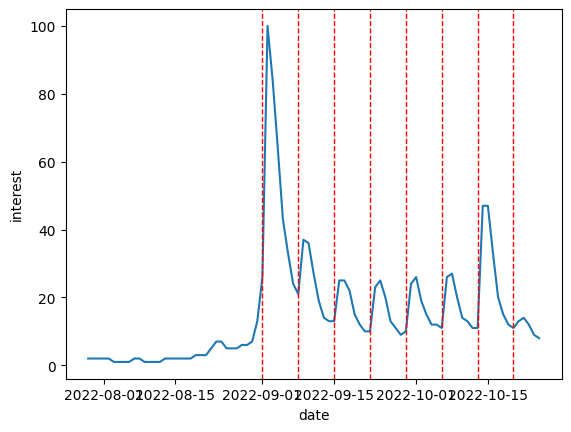

In [197]:
start_date = datetime.strptime('2022-09-01', "%Y-%m-%d")
episode_dates = [start_date]

for x in range(1,8):
    episode_dates.append(start_date + timedelta(days=7*x))
    
sns.lineplot(trends, x = trends.date, y = trends.interest)
plt.figsize=(14,42)
for x in episode_dates:
    plt.axvline(pd.to_datetime(x), color='r', linestyle='--', lw=1)

[datetime.datetime(2022, 9, 1, 0, 0),
 datetime.datetime(2022, 9, 8, 0, 0),
 datetime.datetime(2022, 9, 15, 0, 0),
 datetime.datetime(2022, 9, 22, 0, 0),
 datetime.datetime(2022, 9, 29, 0, 0),
 datetime.datetime(2022, 10, 6, 0, 0),
 datetime.datetime(2022, 10, 13, 0, 0),
 datetime.datetime(2022, 10, 20, 0, 0)]

In [176]:
trends.iloc['2022-10-23']

TypeError: Cannot index by location index with a non-integer key

### Common User Ratings

In [227]:
rop_df = pd.read_csv("../src/data/rop.csv")
rop_df["show"] = "rop"
hotd_df = pd.read_csv("../src/data/hotd_s1.csv")
hotd_df["show"] = "hotd"

In [205]:
rop_df.user_name.nunique()

5426

In [206]:
hotd_df.user_name.nunique()

2762

In [212]:
(rop_df.user_name.nunique() + hotd_df.user_name.nunique()) -  len(set(hotd_df.user_name) - set(rop_df.user_name))

5476

In [211]:
(rop_df.user_name.nunique() + hotd_df.user_name.nunique()) - len(set(rop_df.user_name) - set(hotd_df.user_name))

2812

In [214]:
len(set(rop_df.user_name).intersection(set(hotd_df.user_name)))

50

In [216]:
len(set(hotd_df.user_name).intersection(set(rop_df.user_name)))

50

In [208]:
set(hotd_df) - set(rop_df.user_name)

{'episode_number',
 'num_helpful_reactions',
 'num_total_reactions',
 'review_date',
 'review_rating',
 'review_text',
 'review_title',
 'user_name'}

In [217]:
rop_df.shape[0]

5501

In [218]:
rop_df.user_name.value_counts()

carlostbj11        4
RubyMouse9         4
provoko-6784713    4
dmjrnbsn-307622    3
luisq0516          3
                  ..
runforhim41217     1
Blade754503        1
adamfreihaut24     1
ojczeo7            1
riccardoeste3      1
Name: user_name, Length: 5426, dtype: int64

In [219]:
rop_df[rop_df.user_name == 'carlostbj11']

,review_rating,user_name,review_date,review_title,review_text,num_helpful_reactions,num_total_reactions,episode_number,season_number
49,4.0,carlostbj11,11 September 2022,Still need to improve,This episode seemed more monotonous to me than...,5.0,10.0,2,1
179,3.0,carlostbj11,11 September 2022,"Well, nothing to see here...I tried. And I'm ...",This episode managed to be more uninteresting ...,1.0,2.0,3,1
725,5.0,carlostbj11,11 September 2022,I expected more,"I was really looking forward to this series, t...",6.0,11.0,1,1
4160,4.0,carlostbj11,11 September 2022,"I expected too much, and I'm sad.",I stopped watching in episode 3. Very weak dia...,0.0,1.0,0,0


In [228]:
rop_hotd_df = pd.concat([rop_df, hotd_df])

In [229]:
common_users = set(hotd_df.user_name).intersection(set(rop_df.user_name))

In [230]:
rop_hotd_df = rop_hotd_df[rop_hotd_df.user_name.isin(common_users)]

In [231]:
rop_hotd_df.review_rating.mean()

6.616161616161616

In [233]:
rop_hotd_df[rop_hotd_df.show == "rop"].review_rating.mean()

6.02

In [234]:
rop_hotd_df[rop_hotd_df.show == "hotd"].review_rating.mean()

7.224489795918367

In [235]:
rop_df.review_rating.mean()

4.881552326650726

In [237]:
rop_df.groupby("episode_number").agg(avg_rating=("review_rating", "mean"))

,avg_rating
episode_number,
0,4.754250
1,5.252033
2,5.341463
3,5.051724
4,5.688525
5,4.653333
6,6.755906
7,4.018519
8,6.272109


In [238]:
hotd_df.groupby("episode_number").agg(avg_rating=("review_rating", "mean"))

,avg_rating
episode_number,
0,6.156569
1,8.190349
2,7.129252
3,7.684848
4,7.277778
5,7.375000
6,5.194631
7,7.455285
8,8.867257


In [239]:
len(hotd_df)

2814